## Aula 05

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
from statsmodels.formula.api import ols
import statsmodels.api as sm

##### Questão 1:Regressão linear múltipla  as variáveis explicativas do conjunto de dados Prestigio. Realize o processo de seleção de variáveis explicativas pelo método backward (manualmente, eliminando cada variável, com base no p-valor do teste de sua significância no modelo), considerando um nível de significância de 5%.

In [16]:
# Dados
df = pd.read_csv("Prestigio.csv", sep = ',', na_values = '-', encoding= 'unicode_escape')
df.head()

,occupation,education,income,women,prestige,census,type
0,gov.administrators,13.11,12351,11.16,68.8,1113,prof
1,general.managers,12.26,25879,4.02,69.1,1130,prof
2,accountants,12.77,9271,15.70,63.4,1171,prof
3,purchasing.officers,11.42,8865,9.11,56.8,1175,prof
4,chemists,14.62,8403,11.68,73.5,2111,prof


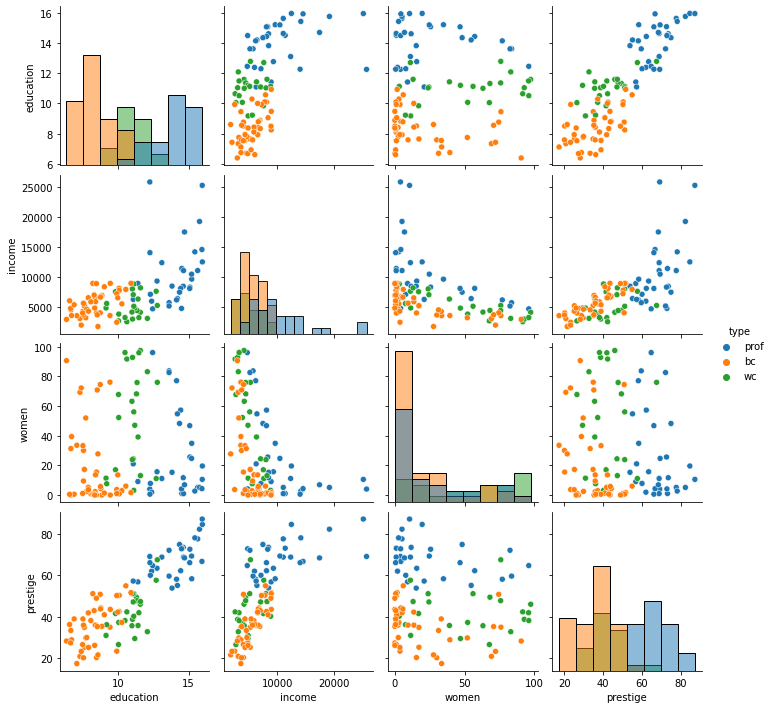

In [3]:

df = df[["education","income","women","prestige","type"]]

# Constrói os gráficos de dispersão em pares diferenciando por "type"
import seaborn as sns

sns.pairplot(df, hue = 'type',diag_kind = "hist")

In [4]:
#comando para excluir os dados faltantes

df = df.dropna()  

#comando para criar uma variável dummy para cada categoria de 'type';
#na regressão usaremos apenas 2 dessas variáveis criadas e aquela que ficar de fora, representará a categoria de referência

df = pd.concat([df, pd.get_dummies(df['type'].astype('category'), prefix = 'd')], axis = 1) 
print(df)

     education  income  women  prestige  type  d_bc  d_prof  d_wc
0        13.11   12351  11.16      68.8  prof     0       1     0
1        12.26   25879   4.02      69.1  prof     0       1     0
2        12.77    9271  15.70      63.4  prof     0       1     0
3        11.42    8865   9.11      56.8  prof     0       1     0
4        14.62    8403  11.68      73.5  prof     0       1     0
..         ...     ...    ...       ...   ...   ...     ...   ...
97        7.58    5562   9.47      35.9    bc     1       0     0
98        7.93    4224   3.59      25.1    bc     1       0     0
99        8.37    4753   0.00      26.1    bc     1       0     0
100      10.00    6462  13.58      42.2    bc     1       0     0
101       8.55    3617  70.87      35.2    bc     1       0     0

[98 rows x 8 columns]


In [24]:
# Calcula as variáveis centradas

income_c = df.income-np.mean(df.income)
education_c = df.education-np.mean(df.education)
women_c = df.women-np.mean(df.women)
df.head()
print(type(income_c))
#df["income_C"] = income_c
#df.head
#df["income_C"] = df.income-np.mean(df.income)

<class 'pandas.core.series.Series'>


In [25]:
# Modelo de regressão com as variáveis explicativas centradas e com a váriável type

mod = ols('prestige ~ income_c + education_c + women_c + d_prof + d_wc',data=df)
res = mod.fit()
print(res.summary())

#Fazendo a seleção das variáveis explicativas pelo método backward considerando alpha=0,05

# A primeira variável a ser retirada é "women_c ", com p-valor de 0,832

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     93.07
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.93e-34
Time:                        19:09:22   Log-Likelihood:                -328.48
No. Observations:                  98   AIC:                             669.0
Df Residuals:                      92   BIC:                             684.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.1442      1.887     24.453      

In [7]:
# Modelo sem a variável women_c

mod = ols('prestige ~ income_c + education_c + d_prof + d_wc',data=df)
res = mod.fit()
print(res.summary())

# A segunda variável a ser retirada é "d_wc", com p-valor 0,279

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.70e-35
Time:                        19:08:49   Log-Likelihood:                -328.51
No. Observations:                  98   AIC:                             667.0
Df Residuals:                      93   BIC:                             679.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.0597      1.835     25.101      

In [8]:
# Modelo de regressão sem as variáveis women_c e d_wc (Modelo Final)

mod = ols('prestige ~ income_c + education_c + d_prof',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     156.0
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.24e-36
Time:                        19:08:49   Log-Likelihood:                -329.13
No. Observations:                  98   AIC:                             666.3
Df Residuals:                      94   BIC:                             676.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.4860      1.132     39.307      

##### Agora, todos os parâmetros de regressão são significativamente diferentes de zero e, portanto, este é o modelo final.

In [9]:
mod = ols('prestige ~ income_c + education_c + income_c * d_prof',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           4.53e-39
Time:                        17:55:34   Log-Likelihood:                -319.80
No. Observations:                  98   AIC:                             649.6
Df Residuals:                      93   BIC:                             662.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          46.9029      1.170     

##### Questão 3: Usar o modelo da questão 2 (com as 98 ocupações com dados completos) para predizer o prestígio de uma ocupação do tipo profissional com tempo médio de educação igual a 15,22 e renda média de 9593.

In [11]:
#mod = ols('df.prestige ~ income_c + education_c + income_c * d_prof',data=df)
#res = mod.fit()

res.predict(df)  #valores preditos pelo modelo para a variável resposta prestígio.

0      66.018231
1      71.900321
2      63.063426
3      58.721637
4      68.122947
         ...    
97     33.499930
98     30.996104
99     33.737451
100    43.225159
101    31.256853
Length: 98, dtype: float64

In [14]:
#para predizer o prestígio de uma ocupação do tipo profissional 
#com tempo médio de educação igual a 15,22 e renda média de 9593.

renda= 9593-np.mean(df.income)
educacao= 15.22-np.mean(df.education)
d_prof=1

ynovo = [renda, educacao, d_prof]

res.predict(exog=dict(income_c=renda,education_c=educacao,d_prof=d_prof)) 



0    70.68368
dtype: float64